# Braiding Phase $\varphi_{br}$ by depletion profile

# Note that use torus_distence() function in Charge calculation

https://arxiv.org/pdf/1910.05222.pdf (Section B. Lattice generalization)

In [26]:
using NBInclude
using Plots
using LaTeXStrings
using SparseArrays
using DataFrames
using Interpolations
using LinearAlgebra
using ProgressMeter
@nbinclude("Hofstadter Single Particle in Julia.ipynb")
@nbinclude("../First Band Approximation Functions.ipynb")
@nbinclude("../Hofstadter Many Body Utils.ipynb")
@nbinclude("../Braiding Utils.ipynb")
@nbinclude("Torus_Distance.ipynb")
@nbinclude("../Braiding_Phase_Depletion_Script.ipynb");

In [32]:

# nbexport("../Braid_Depletion_Truba_Julia_Files/Hofstadter_Single_Particle_in_Julia.jl", "Hofstadter Single Particle in Julia.ipynb")
# nbexport("../Braid_Depletion_Truba_Julia_Files/First_Band_Approximation_Functions.jl","../First Band Approximation Functions.ipynb")
# nbexport("../Braid_Depletion_Truba_Julia_Files/Hofstadter_Many_Body_Utils.jl","../Hofstadter Many Body Utils.ipynb")
# nbexport("../Braid_Depletion_Truba_Julia_Files/Braiding_Utils.jl","../Braiding Utils.ipynb")
# nbexport("../Braid_Depletion_Truba_Julia_Files/Torus_Distance.jl","Torus_Distance.ipynb")
# nbexport("../Braid_Depletion_Truba_Julia_Files/Braiding_Phase_Depletion_Script.jl","../Braiding_Phase_Depletion_Script.ipynb")



In [2]:
Nx=10
Ny=8
p=1
q=10
par_num = 3
U = 2
V_Strength = 4

N=Nx*Ny
NPhi = Int( Nx * Ny * (p/q) )
cut_off = NPhi
PN = [i for i in 1:par_num];

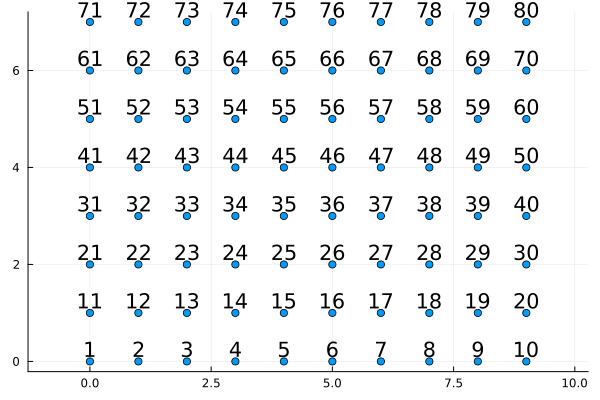

([0 0; 1 0; … ; 8 7; 9 7], nothing)

In [3]:
plot_square_lattice(Nx, Ny)

In [4]:
# 18x18, PN=4 (135)
x = 0.1
ref_site = 35
V0 = [V_Strength,x*V_Strength,x*V_Strength,x*V_Strength,x*V_Strength]
Imp_Site = [ref_site,ref_site-1,ref_site+1,ref_site+Nx,ref_site-Nx]
N_Pin = 2

2

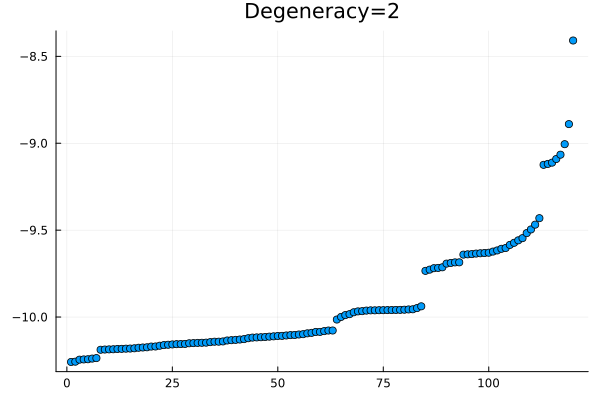

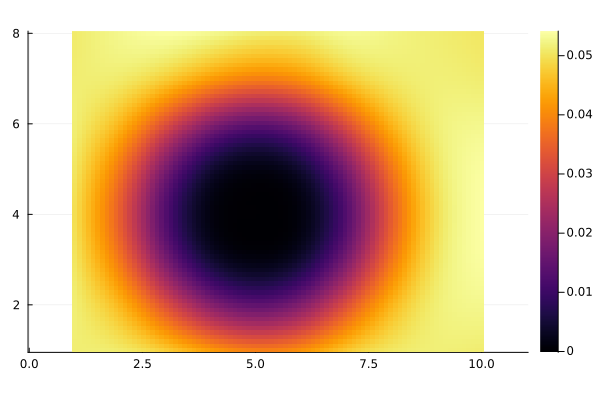

([-10.258469600513015, -10.256807298464992, -10.245255058076117, -10.243868705229222, -10.242805510594602, -10.239030687219984, -10.236121512053932, -10.188191824840347, -10.186954380578635, -10.186060939528268  …  -9.468346913206256, -9.431107608408816, -9.124156278545449, -9.118811629807851, -9.111595339602115, -9.0905969300383, -9.065835191751626, -9.00531885599078, -8.889798217477342, -8.408782296425835], 2, [0.05144751572035462 0.051508493339867435 … 0.05144751572035487 0.051102847046561095; 0.05103463038508682 0.0452157196795735 … 0.051034630385087085 0.052819917399894376; … ; 0.051685448422830765 0.05160367827223067 … 0.051685448422831876 0.05142396133953178; 0.05133142068516977 0.052822899800689396 … 0.051331420685171034 0.050616639495045856])

In [5]:
ϵ, Degeneracy, avg_density = impurity_control(V_Strength, V0, Imp_Site, N_Pin)

In [6]:
savefig(scatter(ϵ[1:5]),"First_4_energies_Npin_$(N_Pin).png")

"/home/can/Fractional_Statistics/Kagome-Lattice/My Numerical Calculations/Many-Body/Hofstadter/First_4_energies_Npin_2.png"

In [7]:
savefig(scatter(ϵ[1:Degeneracy+1]),"Zoom_In_Energies_Npin_$(N_Pin).png")

"/home/can/Fractional_Statistics/Kagome-Lattice/My Numerical Calculations/Many-Body/Hofstadter/Zoom_In_Energies_Npin_2.png"

In [8]:
# Gap Ratio
# (ϵ[8]-ϵ[7])/(ϵ[7]-ϵ[1])

In [33]:
ref_par_density = get_ref_prtcl_density(par_num,p,q,NPhi,N_Pin)
println("Summation(2qh):",sum(ref_par_density .- avg_density)) 

Summation(2qh):0.49999999999999817


In [10]:
filling_frac = par_num / (NPhi-N_Pin)
frac_charge = (filling_frac)*N_Pin
println("Charge(2qh):",frac_charge)

Charge:1.0


In [11]:
Coords = get_coords_square(Nx, Ny);

In [12]:
# torus_distance_func(Coords, Coords[50], Coords[41]);

# Masking Method

In [13]:
dens_2 = avg_density'[1:end-1,:]
#dens_2.*(distance_array.<3)

7×10 Matrix{Float64}:
 0.0514475  0.0510346  0.0476487  …  0.0506675  0.0516854  0.0513314
 0.0515085  0.0452157  0.0323982     0.0450926  0.0516037  0.0528229
 0.0504893  0.0377103  0.0181199     0.037768   0.0505078  0.053913
 0.0496936  0.0342047  0.0128901     0.0343282  0.0497067  0.0541578
 0.0504893  0.0377103  0.0181199     0.037768   0.0505078  0.053913
 0.0515085  0.0452157  0.0323982  …  0.0450926  0.0516037  0.0528229
 0.0514475  0.0510346  0.0476487     0.0506675  0.0516854  0.0513314

In [14]:
Ny=7
N=Nx*Ny
NPhi = Int( Nx * Ny * (p/q) )
cut_off = NPhi

7

In [15]:
x = 0
V0 = [V_Strength,x*V_Strength,x*V_Strength,x*V_Strength,x*V_Strength]
N_Pin = 1

1

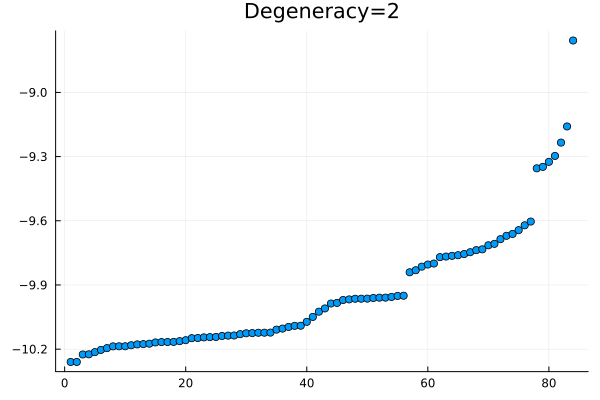

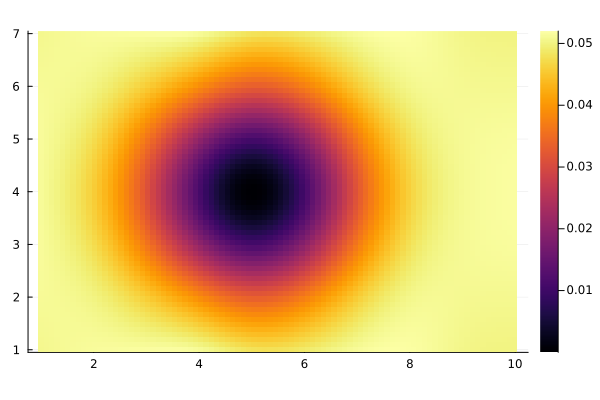

([-10.259874651961912, -10.259750732009152, -10.224855312185763, -10.224137792183248, -10.213885063789316, -10.203399734755836, -10.19513668009544, -10.186896951695326, -10.186624307668799, -10.186512595334328  …  -9.643816033884377, -9.621148918383726, -9.60367880565611, -9.354870212247132, -9.348053626709495, -9.324545071112382, -9.296947700746221, -9.234588721241765, -9.159177669505308, -8.757488765021371], 2, [0.05079700152477043 0.05123224522615542 … 0.05123224522615574 0.05079700152477035; 0.05148170239947797 0.05013811958647853 … 0.050138119586478166 0.051481702399477476; … ; 0.050570678452515075 0.05096057007977446 … 0.05096057007977422 0.05057067845251534; 0.05016921599204547 0.05086849155477234 … 0.05086849155477271 0.05016921599204571])

In [16]:
ϵ, Degeneracy, avg_density = impurity_control(V_Strength, V0, Imp_Site, N_Pin)

In [17]:
savefig(scatter(ϵ[1:5]),"First_4_energies_Npin_$(N_Pin).png")

"/home/can/Fractional_Statistics/Kagome-Lattice/My Numerical Calculations/Many-Body/Hofstadter/First_4_energies_Npin_1.png"

In [18]:
savefig(scatter(ϵ[1:Degeneracy+1]),"Zoom_In_Energies_Npin_$(N_Pin).png")

"/home/can/Fractional_Statistics/Kagome-Lattice/My Numerical Calculations/Many-Body/Hofstadter/Zoom_In_Energies_Npin_1.png"

In [19]:
ref_par_density = get_ref_prtcl_density(par_num,p,q,NPhi,N_Pin)
println("Summation(1qh):",sum(ref_par_density .- avg_density)) 

Summation:0.49999999999999817


In [20]:
filling_frac = par_num / (NPhi-N_Pin)
frac_charge = (filling_frac)*N_Pin
println("Charge(1qh):",frac_charge)

Charge:0.5


In [21]:
Coords = get_coords_square(Nx, Ny);

In [22]:
distance_array = []
for j in 1:N
    push!(distance_array,distance_func(Coords, Coords[ref_site], Coords[j]))
end
distance_array = reshape(distance_array,Nx,Ny)'

7×10 adjoint(::Matrix{Any}) with eltype Any:
 5.0      4.24264  3.60555  3.16228  …  3.60555  4.24264  5.0      5.83095
 4.47214  3.60555  2.82843  2.23607     2.82843  3.60555  4.47214  5.38516
 4.12311  3.16228  2.23607  1.41421     2.23607  3.16228  4.12311  5.09902
 4.0      3.0      2.0      1.0         2.0      3.0      4.0      5.0
 4.12311  3.16228  2.23607  1.41421     2.23607  3.16228  4.12311  5.09902
 4.47214  3.60555  2.82843  2.23607  …  2.82843  3.60555  4.47214  5.38516
 5.0      4.24264  3.60555  3.16228     3.60555  4.24264  5.0      5.83095

In [23]:
dens_1 = avg_density'
#dens_1.*(distance_array.<3)

7×10 adjoint(::Matrix{Float64}) with eltype Float64:
 0.050797   0.0514817  0.0517252  …  0.0519114  0.0505707  0.0501692
 0.0512322  0.0501381  0.0457644     0.0505915  0.0509606  0.0508685
 0.0514086  0.0474785  0.0363546     0.0479192  0.0510832  0.0515702
 0.0512896  0.0458586  0.0313639     0.0462805  0.0509407  0.0517614
 0.0514086  0.0474785  0.0363546     0.0479192  0.0510832  0.0515702
 0.0512322  0.0501381  0.0457644  …  0.0505915  0.0509606  0.0508685
 0.050797   0.0514817  0.0517252     0.0519114  0.0505707  0.0501692

In [24]:
# distance_array.<=R_max[19]

In [25]:
a = 1 # lattica constant
α = p/q # flux per plaquette
l_b = a/sqrt(2*pi*α)
braid_phase = []
braiding_density = ((1/2)/l_b^2)*(dens_2 .- 2*dens_1).*(distance_array.^2)
savefig(heatmap(dens_1),"dens_1_heatmap.png")
savefig(heatmap(dens_2),"dens_2_heatmap.png")
savefig(heatmap(braiding_density),"braiding_density_heatmap.png")
R_max = sort(unique(distance_array))
println(R_max)
for r in R_max
    push!(braid_phase, sum(braiding_density .* (distance_array.<=r)))
end
av_braiding = sum(mod.(braid_phase,1))/length(braid_phase)
plot(R_max,mod.(braid_phase,1),xlabel=L"R_{max}[l_b]", ylabel=L"\varphi_{br}[2\pi]" ,title=L"\frac{\varphi_{br}}{2\pi} = \frac{1}{2l_b^2} \sum_j \left[d_{2qh}-2d_{1qh} \right] |\rho_j|^2", label="$(av_braiding)",marker=(:circle,5))
x=0;g(x)=frac_charge
P = plot!(g, x, 7, label="$(filling_frac)")
savefig(P,"Braiding_Phase.png")

Any[0.0, 1.0, 1.4142135623730951, 2.0, 2.23606797749979, 2.8284271247461903, 3.0, 3.1622776601683795, 3.605551275463989, 4.0, 4.123105625617661, 4.242640687119285, 4.47213595499958, 5.0, 5.0990195135927845, 5.385164807134504, 5.830951894845301]


"/home/can/Fractional_Statistics/Kagome-Lattice/My Numerical Calculations/Many-Body/Hofstadter/Braiding_Phase.png"

# Array Method

In [ ]:
# Redefine parameter sets

# 1 QH

In [254]:
@nbinclude("../Braiding_Phase_Depletion_Script.ipynb")

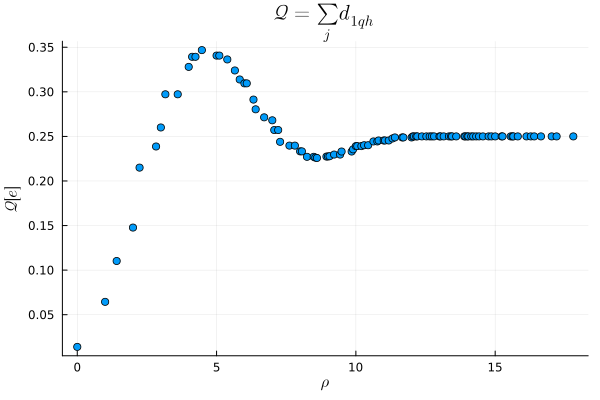

In [255]:
radius_list_1_qh, d_1_qh_list = fractional_charge(Nx, Ny, ref_site)
scatter(radius_list_1_qh, d_1_qh_list, xlabel=L"\rho", ylabel=L"\mathcal{Q}[e]", title=L"\mathcal{Q} = \sum_j d_{1qh}",legend=:false)

In [299]:
# NOT ET: D değişikliği!
# radius_list_1_qh, d_1_qh_list = fractional_charge(Nx, Ny, ref_site)
# scatter(radius_list_1_qh, d_1_qh_list, xlabel=L"\rho", ylabel=L"\mathcal{Q}[e]", title=L"\mathcal{Q} = \sum_j d_{1qh}",legend=:false)

In [359]:
@nbinclude("../Braiding_Phase_Depletion_Script.ipynb")

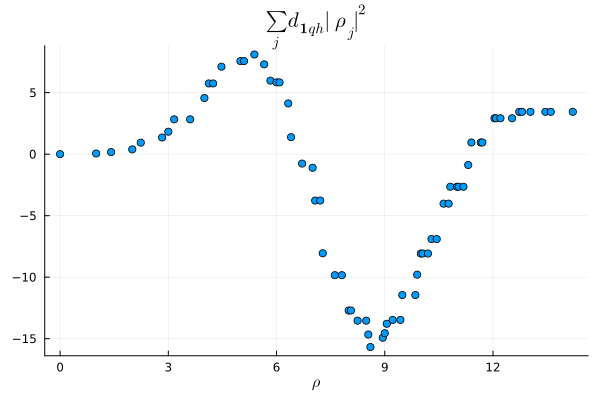

In [300]:
d_1_qh_list_2 = fractional_charge_2(Nx, Ny, ref_site)
scatter(radius_list_1_qh, d_1_qh_list_2, xlabel=L"\rho", title=L"\sum_j d_{\mathbf{1}qh} |\rho_j|^2", legend=:false)

In [168]:
# d_1_qh_site_list = []
# for j in 1:70
#     push!(d_1_qh_site_list, d_k_qh(j))
# end

In [169]:
# d_1_QH_Matrix = ref_par_density .- avg_density

# 2 QH

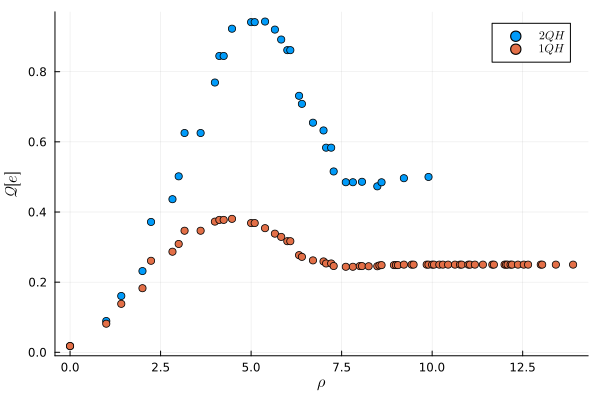

In [372]:
radius_list_2_qh, d_2_qh_list = fractional_charge(Nx, Ny, ref_site)
scatter(radius_list_2_qh, d_2_qh_list, label=L"2 QH")
scatter!(radius_list_1_qh, d_1_qh_list, label=L"1 QH", xlabel=L"ρ", ylabel=L"\mathcal{Q}[e]")

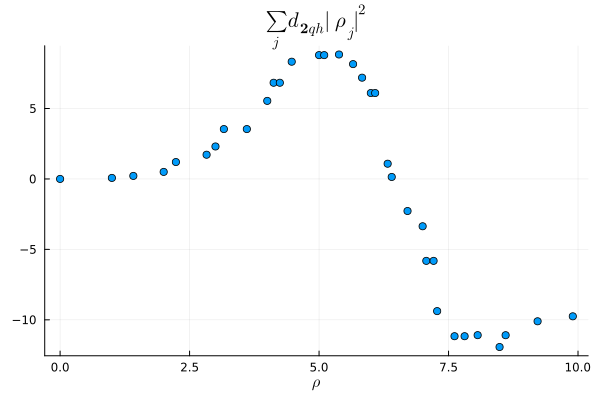

In [373]:
d_2_qh_list_2 = fractional_charge_2(Nx, Ny, ref_site)
scatter(radius_list_2_qh, d_2_qh_list_2, xlabel=L"\rho", title=L"\sum_j d_{ \mathbf{2} qh} |\rho_j|^2", legend=:false)

In [374]:
# d_2_qh_site_list = []
# for j in 1:80
#     push!(d_2_qh_site_list, d_k_qh(j))
# end

In [375]:
# d_2_QH_Matrix = ref_par_density .- avg_density

In [376]:
n = 29
radius_list_1_qh[1:n] == radius_list_2_qh[1:n]

true

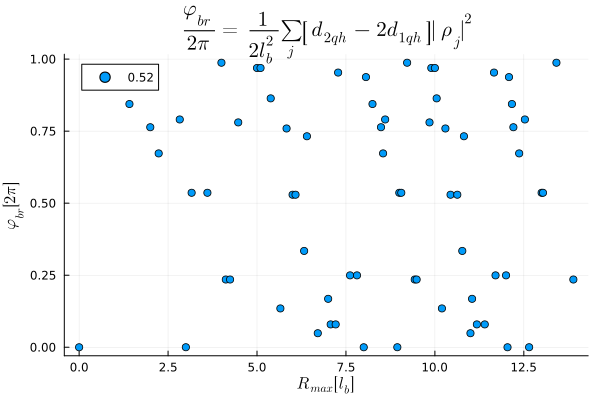

In [377]:
a = 1 # lattica constant
α = p/q # flux per plaquette
l_b = a/sqrt(2*pi*α) # magnetic length
ϕ = (1/2*l_b^2) * (d_2_qh_list_2[1:n] .- 2*d_1_qh_list_2[1:n])
ϕ = mod.(ϕ, 1)
av_br = round(sum(ϕ)/length(ϕ),digits=2)
scatter([radius_list_1_qh],[ϕ], xlabel=L"R_{max}[l_b]", ylabel=L"\varphi_{br}[2\pi]" ,title=L"\frac{\varphi_{br}}{2\pi} = \frac{1}{2l_b^2} \sum_j \left[d_{2qh}-2d_{1qh} \right] |\rho_j|^2", label="$(av_br)")

In [51]:
BRAIDING = []
for j in 1:19
    a = 1 # lattica constant
    α = p/q # flux per plaquette
    l_b = a/sqrt(2*pi*α)
    push!(BRAIDING,mod((pi/l_b^2) * (d_2_qh_list[j] .- 2* d_1_qh_list[j]) * radius_list_2_qh[j]^2, 2*pi))
end

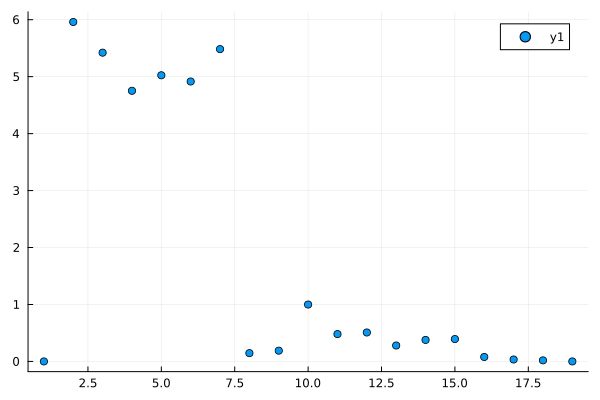

In [52]:
scatter(BRAIDING)

In [43]:
d_2_QH_Matrix'[2:end,:]

7×10 Matrix{Float64}:
 -0.00369808   -0.00226415    0.00438916   …   0.00438916   -0.00226415
 -0.00693168   -0.00300997    0.0119526        0.0119526    -0.00300997
 -0.00753096   -0.00223376    0.0161934        0.0161934    -0.00223376
 -0.00693168   -0.00300997    0.0119526        0.0119526    -0.00300997
 -0.00369808   -0.00226415    0.00438916       0.00438916   -0.00226415
 -0.00114981   -0.000335694   0.000219841  …   0.000219841  -0.000335694
 -0.000278627   0.000876359  -9.16338e-5      -9.16338e-5    0.000876359

In [44]:
d_1_QH_Matrix'

7×10 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.000510599  -0.000685625  -0.000959897  …  -0.000959897  -0.000685625
 -0.0012032    -0.00109324    0.000199024      0.000199024  -0.00109324
 -0.00189359   -0.00122845    0.00266856       0.00266856   -0.00122845
 -0.00207483   -0.00108582    0.0042201        0.0042201    -0.00108582
 -0.00189359   -0.00122845    0.00266856       0.00266856   -0.00122845
 -0.0012032    -0.00109324    0.000199024  …   0.000199024  -0.00109324
 -0.000510599  -0.000685625  -0.000959897     -0.000959897  -0.000685625

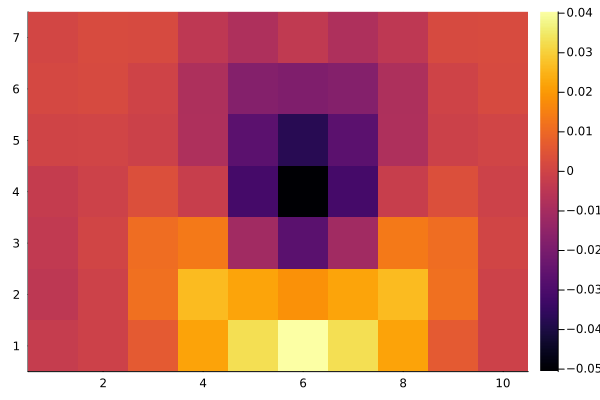

In [46]:
d_mat = (d_2_QH_Matrix'[2:end,:] .- 2*d_1_QH_Matrix') 
# ? * radius_list_2_qh[1:16][j]^2
heatmap(d_mat)

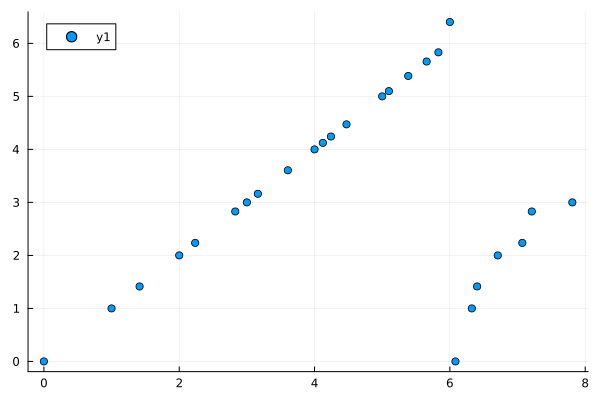

In [44]:
scatter(radius_list_1_qh,radius_list_2_qh)

In [177]:
# radius_list_1_qh[1:16] = radius_list_2_qh[1:16]
ρ_list = radius_list_1_qh[1:16];

In [178]:
d_1_qh_listt = d_1_qh_list[1:16]

16-element Vector{Any}:
 0.049999380622123425
 0.205668790979897
 0.32671336111759686
 0.39416932475783123
 0.49722906270988904
 0.513777939337057
 0.5211913730855289
 0.5332476490182907
 0.5332476490182907
 0.5251584303745862
 0.5202446296907528
 0.5202446296907528
 0.5120320894982568
 0.5072147603105793
 0.5072147603105793
 0.5034275883472364

In [37]:
d_2_qh_listt = d_2_qh_list[1:16]

16-element Vector{Any}:
 0.04999966557158243
 0.24747569125187546
 0.4350966567658118
 0.594378441360567
 0.866901146027672
 0.9408966004913278
 0.9973723670156989
 1.073858170772719
 1.073858170772719
 1.0819463516149823
 1.0547933734968191
 1.0547933734968191
 1.031142054065428
 1.0220850493806282
 1.0220850493806282
 1.0082216903420471

In [45]:
@nbinclude("../Braiding_Phase_Depletion_Script.ipynb")

get_braid_phase2 (generic function with 1 method)

In [44]:
#distance_func(Coords, Coords[ref_site], Coords[j])
radius_list

19-element Vector{Any}:
 0.0
 1.0
 1.4142135623730951
 2.0
 2.23606797749979
 2.8284271247461903
 3.0
 3.1622776601683795
 3.605551275463989
 4.0
 4.123105625617661
 4.242640687119285
 4.47213595499958
 5.0
 5.0990195135927845
 5.385164807134504
 5.656854249492381
 5.830951894845301
 6.4031242374328485

In [46]:
n = 16
φ_br_list = get_braid_phase(radius_list, d_2_qh_list, d_1_qh_list, p, q, n)

36
26
35
36
37
46
25
26
27
35
36
37
45
46
47
16
25
26
27
34
35
36
37
38
45
46
47
56
15
16
17
24
25
26
27
28
34
35
36
37
38
44
45
46
47
48
55
56
57
14
15
16
17
18
24
25
26
27
28
34
35
36
37
38
44
45
46
47
48
54
55
56
57
58
6
14
15
16
17
18
24
25
26
27
28
33
34
35
36
37
38
39
44
45
46
47
48
54
55
56
57
58
66
5
6
7
14
15
16
17
18
23
24
25
26
27
28
29
33
34
35
36
37
38
39
43
44
45
46
47
48
49
54
55
56
57
58
65
66
67
5
6
7
14
15
16
17
18
23
24
25
26
27
28
29
33
34
35
36
37
38
39
43
44
45
46
47
48
49
54
55
56
57
58
65
66
67
4
5
6
7
8
13
14
15
16
17
18
19
23
24
25
26
27
28
29
32
33
34
35
36
37
38
39
40
43
44
45
46
47
48
49
53
54
55
56
57
58
59
64
65
66
67
68
76
4
5
6
7
8
13
14
15
16
17
18
19
22
23
24
25
26
27
28
29
30
32
33
34
35
36
37
38
39
40
42
43
44
45
46
47
48
49
50
53
54
55
56
57
58
59
64
65
66
67
68
75
76
77
4
5
6
7
8
13
14
15
16
17
18
19
22
23
24
25
26
27
28
29
30
32
33
34
35
36
37
38
39
40
42
43
44
45
46
47
48
49
50
53
54
55
56
57
58
59
64
65
66
67
68
75
76
77
3
4
5
6
7
8
9
12
13
14


16-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

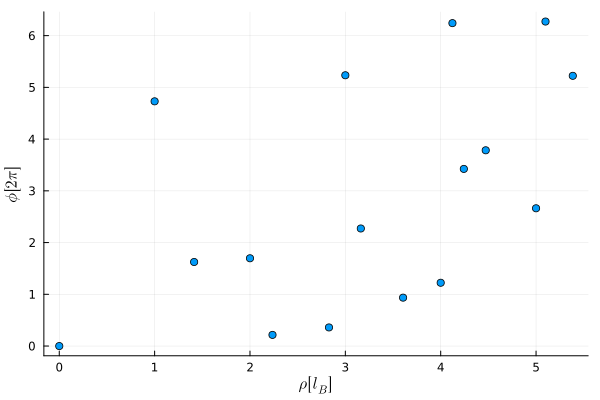

In [181]:
scatter(ρ_list, φ_br_list, xlabel=L"ρ[l_B]", ylabel=L"φ[2π]", legend=:false)

In [151]:
# 1 QH
d_mat_1_qh = ref_par_density .- avg_density'

7×10 Matrix{Float64}:
 -0.000510599  -0.000685625  -0.000959897  …  -0.000959897  -0.000685625
 -0.0012032    -0.00109324    0.000199024      0.000199024  -0.00109324
 -0.00189359   -0.00122845    0.00266856       0.00266856   -0.00122845
 -0.00207483   -0.00108582    0.0042201        0.0042201    -0.00108582
 -0.00189359   -0.00122845    0.00266856       0.00266856   -0.00122845
 -0.0012032    -0.00109324    0.000199024  …   0.000199024  -0.00109324
 -0.000510599  -0.000685625  -0.000959897     -0.000959897  -0.000685625

In [174]:
# 2 QH
d_mat_2_qh = ref_par_density .- avg_density'

8×10 Matrix{Float64}:
 -0.00114981   -0.000335694   0.000219841  …   0.000219841  -0.000335694
 -0.00369808   -0.00226415    0.00438916       0.00438916   -0.00226415
 -0.00693168   -0.00300997    0.0119526        0.0119526    -0.00300997
 -0.00753096   -0.00223376    0.0161934        0.0161934    -0.00223376
 -0.00693168   -0.00300997    0.0119526        0.0119526    -0.00300997
 -0.00369808   -0.00226415    0.00438916   …   0.00438916   -0.00226415
 -0.00114981   -0.000335694   0.000219841      0.000219841  -0.000335694
 -0.000278627   0.000876359  -9.16338e-5      -9.16338e-5    0.000876359

In [194]:
(d_mat_2_qh[2:end,:] - 2*d_mat_1_qh)*ρ_list[3]^2

7×10 Matrix{Float64}:
 -0.00535376   -0.00178579    0.0126179    …   0.0126179    -0.00178579
 -0.00905058   -0.00164699    0.0231091        0.0231091    -0.00164699
 -0.00748758    0.000446272   0.0217126        0.0217126     0.000446272
 -0.00556404   -0.00167666    0.00702482       0.00702482   -0.00167666
  0.000178191   0.00038551   -0.0018959       -0.0018959     0.00038551
  0.00251315    0.00370156   -0.000356413  …  -0.000356413   0.00370156
  0.00148514    0.00449522    0.00365632       0.00365632    0.00449522